In [54]:
import pandas as pd

In [78]:
df = pd.read_csv('stock_data.csv')
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df.set_index('date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,score
date,,,,,,,,
2021-04-19,133.509995,135.470001,133.339996,134.839996,132.196274,94264200,neutral,0.000000
2021-04-20,135.020004,135.529999,131.809998,133.110001,130.500198,94812300,positive,0.511896
2021-04-21,132.360001,133.750000,131.300003,133.500000,130.882523,68847100,positive,3.324788
2021-04-22,133.039993,134.149994,131.410004,131.940002,129.353134,84566500,positive,-0.032559
2021-04-23,132.160004,135.119995,132.160004,134.320007,131.686493,78657500,positive,-0.419344


<Axes: xlabel='date'>

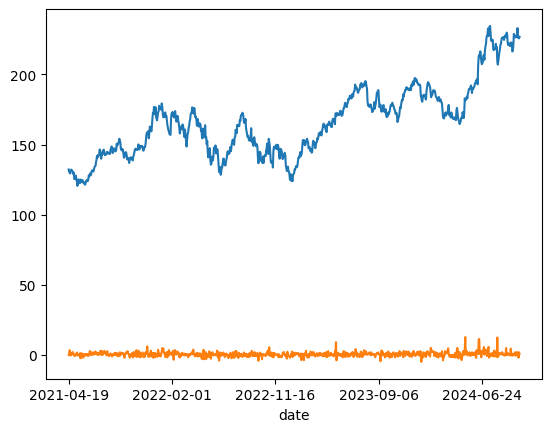

In [79]:
df["Adj Close"].plot()
df.score.plot()

In [80]:
# 1 if price increased next day, 0 if price decreased next day
# df["Next Day"] = df["Adj Close"].shift(-1)
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
# df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# ohe_sentiment = pd.get_dummies(df['sentiment'], prefix='sentiment')
# df = pd.concat([df.drop('sentiment', axis=1), ohe_sentiment], axis=1)

df.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment,score,target
date,,,,,,,,,
2021-04-19,133.509995,135.470001,133.339996,134.839996,132.196274,94264200,neutral,0.000000,0
2021-04-20,135.020004,135.529999,131.809998,133.110001,130.500198,94812300,positive,0.511896,1
2021-04-21,132.360001,133.750000,131.300003,133.500000,130.882523,68847100,positive,3.324788,0
2021-04-22,133.039993,134.149994,131.410004,131.940002,129.353134,84566500,positive,-0.032559,1
2021-04-23,132.160004,135.119995,132.160004,134.320007,131.686493,78657500,positive,-0.419344,1


In [81]:
# add sentiment from previous three days
# df['sentiment_1D'] = df['sentiment'].shift(1)  
# df['sentiment_2D']= df['sentiment'].shift(2)  
# df['sentiment_3D']= df['sentiment'].shift(3)

# df["vol_change"] = df["Volume"].pct_change()
# df["return"] = df["Adj Close"].pct_change()

# drop open, high, low, close,
df.drop(['Open', 'High', 'Low', 'Close', "Volume",  "score", "sentiment" ], axis=1, inplace=True) 
df.head()

,Adj Close,target
date,,
2021-04-19,132.196274,0
2021-04-20,130.500198,1
2021-04-21,130.882523,0
2021-04-22,129.353134,1
2021-04-23,131.686493,1


In [82]:
# drop rows with NaN values
df.dropna(inplace=True)


In [83]:
df.head()

,Adj Close,target
date,,
2021-04-19,132.196274,0
2021-04-20,130.500198,1
2021-04-21,130.882523,0
2021-04-22,129.353134,1
2021-04-23,131.686493,1


Models
1. Logsitic Regression
2. Random forest
3. See some ensembling methods

In [84]:
# logisitic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
df.head()

,Adj Close,target
date,,
2021-04-19,132.196274,0
2021-04-20,130.500198,1
2021-04-21,130.882523,0
2021-04-22,129.353134,1
2021-04-23,131.686493,1


In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0, 83],
       [ 0, 92]], dtype=int64)

In [88]:
# accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5257142857142857
0.5257142857142857
1.0
0.6891385767790262


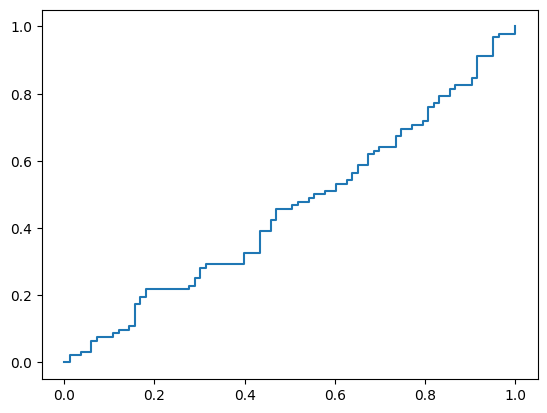

In [89]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.4557359874279728

In [91]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# accuracy, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5028571428571429
0.5294117647058824
0.4891304347826087
0.5084745762711864


0.5058931377684652

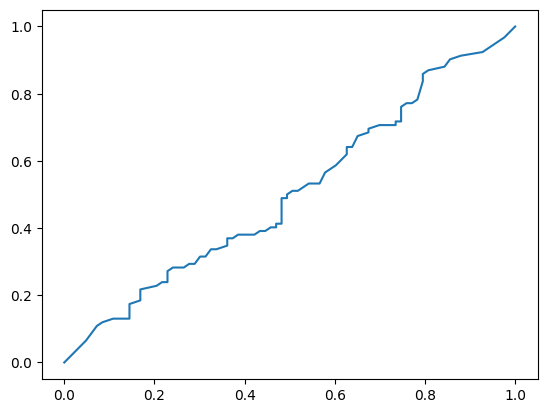

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

roc_auc_score(y_test, y_pred_proba)

In [94]:
!pip install catboost

In [95]:
# cat boost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.008836
0:	learn: 0.6929529	total: 2.91ms	remaining: 2.91s
1:	learn: 0.6928169	total: 4.88ms	remaining: 2.43s
2:	learn: 0.6926766	total: 6.88ms	remaining: 2.29s
3:	learn: 0.6924769	total: 8.64ms	remaining: 2.15s
4:	learn: 0.6922913	total: 10.7ms	remaining: 2.12s
5:	learn: 0.6921652	total: 12.7ms	remaining: 2.11s
6:	learn: 0.6920100	total: 14.4ms	remaining: 2.05s
7:	learn: 0.6918819	total: 17.3ms	remaining: 2.15s
8:	learn: 0.6917351	total: 19.6ms	remaining: 2.15s
9:	learn: 0.6916215	total: 21.4ms	remaining: 2.12s
10:	learn: 0.6915071	total: 23.1ms	remaining: 2.07s
11:	learn: 0.6913626	total: 24.8ms	remaining: 2.04s
12:	learn: 0.6912524	total: 26.5ms	remaining: 2.01s
13:	learn: 0.6911391	total: 27.6ms	remaining: 1.94s
14:	learn: 0.6909931	total: 29.3ms	remaining: 1.93s
15:	learn: 0.6908372	total: 31.1ms	remaining: 1.91s
16:	learn: 0.6906757	total: 33.2ms	remaining: 1.92s
17:	learn: 0.6904992	total: 34.9ms	remaining: 1.9s
18:	learn: 0.6903352	total: 36.6ms	remaining:

In [96]:
# accuracy, precision, recall, f1
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5428571428571428
0.5576923076923077
0.6304347826086957
0.5918367346938775


0.5272393923520168

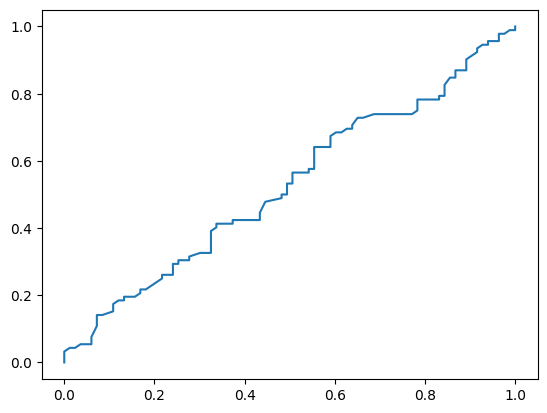

In [97]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

roc_auc_score(y_test, y_pred_proba)

In [98]:
# xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# accuracy, precision, recall, f1
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5314285714285715
0.5471698113207547
0.6304347826086957
0.5858585858585859


0.5546752226296491

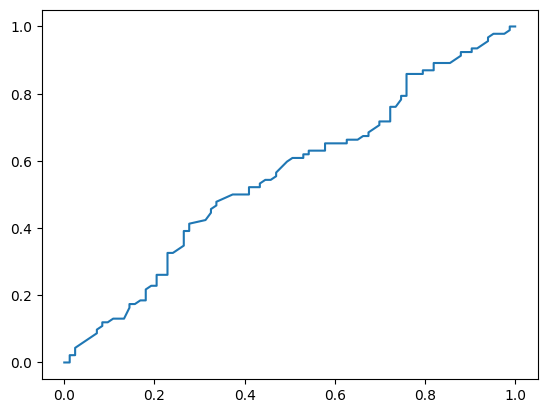

In [99]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)

roc_auc_score(y_test, y_pred_proba)

In [100]:
# !pip install xgboost